# Lezione 9

**Dizionari**

Un dizionario è come un elenco, ma più generico: in un elenco gli indici di posizione devono essere numeri interi; in un dizionario gli indici possono essere (più o meno) di qualsiasi tipo. Possiamo pensare a un dizionario come una *correlazione* tra un insieme di indici (chiamati *chiavi*) e un insieme di *valori*. **Ogni chiave viene associata ad un valore**. Questa associazione è chiamata **coppia chiave-valore** o talvolta elemento. Come esempio, costruiremo un dizionario che associ parole inglesi e spagnole dove, quindi, le chiavi e i valori saranno tutte stringhe.

Possiamo creare un dizionario vuoto tramite la funzione dict. Poiché dict è il nome di una funzione integrata, dovremmo evitare di usarlo come nome di variabile.

In [ ]:
eng2sp = dict() #instantiation of the dictionary
print(eng2sp)

Le parentesi graffe, rappresentano un dizionario vuoto. Per aggiungere elementi al dizionario, dobbiamo usare le parentesi quadre.

In [2]:
eng2sp['one'] = 'uno' #adds a value

Questa linea crea un oggetto che **associa la chiave “one” al valore “uno”**. Se visualizziamo nuovamente il dizionario, vedremo una coppia chiave-valore con due punti tra la chiave e il valore

In [ ]:
print(eng2sp)

Questo formato di output è anche un formato di input. Ad esempio, possiamo creare un nuovo dizionario con tre elementi. Ma se visualizziamo successivamente eng2sp, potremmo rimanere sorpresi

In [5]:
eng2sp = {'one': 'uno', 'two': 'dos', 'three': 'tres'}

In [ ]:
print(eng2sp)

L’ordine delle coppie chiave-valore (*forse*) non è lo stesso!

Se digitiamo lo stesso esempio sul nostro computer, potremmo ottenere un risultato ancora diverso. In generale, l’ordine degli elementi in un dizionario è imprevedibile.

Ma questo non è un problema perché gli elementi di un dizionario non sono mai
indicizzati con indici interi. Invece, vanno usate le chiavi per cercare i valori corrispondenti.

In [ ]:
print(eng2sp['two'])

La chiave *two* si associa sempre al valore *dos* in modo che l’ordine degli oggetti non abbia importanza. Se proviamo a visualizzare una chiave non presente nel dizionario, otterremo un’eccezione

In [ ]:
print(eng2sp['four'])

La funzione `len` può essere utilizzata sui dizionari: restituisce *il numero di coppie chiave-valore*

In [ ]:
len(eng2sp)

L’operatore *in* lavora sui dizionari: ci dice se quello che cerchiamo risulta essere una chiave del dizionario (non verifica i valori!).

In [ ]:
print('one' in eng2sp)
print('uno' in eng2sp)

Per vedere se qualcosa risulta come *valore* in un dizionario, bisogna usare il metodo `values`, che restituisce i valori come un elenco, e successivamente l’operatore `in`

In [ ]:
vals = eng2sp.values()
print(vals)
print('uno' in vals)

L’operatore `in` utilizza algoritmi diversi per elenchi e dizionari.
- Per gli elenchi, utilizza un algoritmo di ricerca lineare. Man mano che l’elenco si allunga, il tempo di ricerca si allunga in proporzione diretta alla dimensione dello stesso.
- Per i dizionari, utilizza un algoritmo chiamato tabella degli hash che ha una proprietà notevole: l’operatore `in` richiede circa la stessa quantità di tempo indipendentemente dal numero di elementi presenti in un dizionario.

Se volete scoprire quale magia si cela dietro le funzioni di hash, potete consultare https://wikipedia.org/wiki/Hash_table

***9.1 Dizionario come insieme di contatori***

Supponiamo di avere una stringa di cui vogliamo contare quante volte appare ogni
lettera. Ci sono diversi modi per farlo:

1. Potremmo creare 26 variabili, una per ogni lettera dell’alfabeto. Quindi potremmo scorrere la stringa e, per ogni carattere, incrementare il contatore
corrispondente, probabilmente usando una condizione concatenata.
2. Potremmo creare una lista con 26 elementi per poi convertire ciascuno in un
numero (utilizzando la funzione `ord`), infine utilizzare il numero come indice
nell’elenco e incrementare il contatore appropriato.
3. Potremmo creare un dizionario con caratteri come chiavi e contatori come valori corrispondenti. La prima volta che troviamo un nuovo carattere, aggiungeremo un elemento al dizionario. Le volte successive, incrementeremo il valore di un elemento esistente.

Ognuna di queste opzioni esegue lo stesso calcolo, ma ognuna di esse lo implementa in un modo diverso.
Un’*implementazione* è un modo di eseguire un calcolo; alcune sono migliori di altre. Ad esempio, un vantaggio dell’adozione di un dizionario è che non dobbiamo sapere in anticipo quali lettere saranno presenti nella stringa ma dobbiamo solo far spazio per quelle che appariranno.

Ecco come potrebbe apparire il codice:

In [ ]:
word = 'brontosaurus'
d = dict()
for c in word:
  if c not in d:
    d[c] = 1
  else:
    d[c] = d[c] + 1
print(d)
print(d['o'])

Stiamo in realtà calcolando un *istogramma*, che è un termine statistico per un
*insieme di contatori* (o frequenze).

Il ciclo `for` analizza la stringa: ogni volta che viene eseguito il ciclo, se il carattere contenuto nella variabile `c` non è nel dizionario, viene creato un nuovo elemento con la chiave `c` e con valore iniziale 1 (poiché abbiamo visto questa lettera una sola volta). Se `c` è già presente nel dizionario incrementiamo `d[c]`.

L’istogramma indica che le lettere "a" e "b" compaiono una sola volta; "o" appare due volte e così via.

I dizionari hanno un metodo chiamato `get` che riceve una chiave e un valore predefinito. Se la chiave è presente nel dizionario, `get` restituisce il valore corrispondente, altrimenti restituisce il valore predefinito.

In [ ]:
counts = { 'chuck' : 1 , 'annie' : 42, 'jan': 100}
print(counts.get('jan', 0))
print(counts.get('tim', 0))

Possiamo usare `get` per scrivere il nostro istogramma in modo più rapido. Dato che il metodo get gestisce automaticamente il caso in cui una chiave non è presente in un dizionario, possiamo ridurre quattro righe ad una sola ed eliminare l’istruzione `if`.

In [ ]:
word = 'brontosaurus'
d = dict()
for c in word:
  d[c] = d.get(c,0) + 1
print(d)

L’uso del metodo `get` per semplificare questo ciclo di conteggio sarà usato molto comunemente in Python e lo vedremo altre volte nel resto del corso. Quindi esaminiamo bene questa seconda soluzione e confrontiamola con la precedente che utilizza l’istruzione `if` e l’operatore `in`. Fanno esattamente la stessa cosa, ma il secondo script è più conciso.

***9.2 Dizionari e file***

Uno degli usi più comuni di un dizionario è contare la frequenza di parole in un
file di testo. Iniziamo con un semplice file tratto dal testo di Romeo e Giulietta.

Per i primi esempi utilizzeremo una versione abbreviata e semplificata del testo
senza segni di punteggiatura. Successivamente lavoreremo con il testo di scena con punteggiatura inclusa.

```
But soft what light through yonder window breaks
It is the east and Juliet is the sun
Arise fair sun and kill the envious moon
Who is already sick and pale with grief
```

Scriveremo un programma Python per leggere le righe del file, suddividerle in un
elenco di parole, quindi contare ogni parola presente utilizzando un dizionario.
Avremo bisogno di due cicli for. Il ciclo esterno legge ognuna delle
righe del file e il ciclo interno si ripete su ciascuna delle parole presenti in quella particolare riga. Questo è un esempio dello schema chiamato *cicli annidati* in quanto abbiamo un *ciclo esterno* e *un ciclo interno*. Poiché il ciclo interno esegue tutte le sue iterazioni ogni volta che il ciclo esterno effettua una singola iterazione, pensiamo come se il ciclo interno iterasse *più rapidamente* e il ciclo esterno *più lentamente*.
La combinazione dei due cicli annidati garantisce che conteremo **ogni parola di
ogni riga** del file in input.

```
fname = input('Enter the file name: ')
try:
  fhand = open(fname)
except:
  print('File cannot be opened:', fname)
  exit()
counts = dict()
for line in fhand:
  words = line.split()
  for word in words:
    if word not in counts:
    counts[word] = 1
    else:
    counts[word] += 1
print(counts)
```

Possiamo creare un file romeo.txt incollandoci dentro il pezzo tratto da Romeo e Giulietta che abbiamo visto sopra, oppure scaricarlo direttamente da www.py4e.com/code3/romeo.txt

**Creiamo lo script ed eseguiamolo...**


È un po’ scomodo cercare nel dizionario le parole più comuni e i loro conteggi,
quindi abbiamo bisogno di aggiungere altro codice Python per ottenere un output
che sia più leggibile.

***9.3 Cicli e dizionari***

Quando utilizziamo un dizionario come argomento in un’*istruzione for*, **tutte le chiavi contenute nel dizionario verranno controllate dal ciclo**.

In [ ]:
counts = { 'chuck' : 1 , 'annie' : 42, 'jan': 100}
for key in counts:
  print(key, counts[key])

Anche qui le chiavi non seguono alcun ordine particolare.

Possiamo usare questo schema per implementare i vari cicli idiomatici che abbiamo descritto in precedenza. Ad esempio, se volessimo trovare tutte le voci in un dizionario con un valore superiore a dieci, potremmo scrivere:

In [ ]:
counts = { 'chuck' : 1 , 'annie' : 42, 'jan': 100}
for key in counts:
  if counts[key] > 10 :
    print(key, counts[key])

Il ciclo *for* scorre le chiavi del dizionario, quindi dobbiamo utilizzare l’*operatore di indice* per recuperare il valore corrispondente per ogni chiave.

Se desiderassi visualizzare le chiavi in ordine alfabetico, sarebbe necessario prima creare un elenco delle chiavi nel dizionario utilizzando il metodo `keys`, quindi ordinare l’elenco e scorrere l’elenco ordinato, cercando ogni chiave e visualizzando l’elenco ordinato delle coppie chiave-valore

In [ ]:
counts = { 'chuck' : 1 , 'annie' : 42, 'jan': 100}
lst = list(counts.keys())
print(lst) #prints the unsorted keys
lst.sort() #sorts
print(lst) #prints the sorted keys
for key in lst:
  print(key, counts[key]) #prints every key and value (sorted by key)

***9.4 Analisi avanzata del testo***

Nell’esempio precedente, utilizzando il file romeo.txt, abbiamo reso il file il più semplice possibile rimuovendo manualmente tutti i segni di punteggiatura. Il testo reale ha molta punteggiatura, come possiamo vedere qui sotto.
```
But, soft! what light through yonder window breaks?
It is the east, and Juliet is the sun.
Arise, fair sun, and kill the envious moon,
Who is already sick and pale with grief,
```
Dato che la funzione `split` cerca spazi e tratta le parole come elementi separati da spazi, tratteremo le parole "soft!" e "soft" come parole differenti e creeremo una voce di dizionario separata per ognuna di queste.

Inoltre, poiché il file è in maiuscolo, considereremo "who" e "Who" come parole diverse con diversi conteggi.
Possiamo risolvere entrambi i problemi usando i metodi per le stringhe `lower`, `punctuation` e `translate`. Il metodo `translate` è il più subdolo:
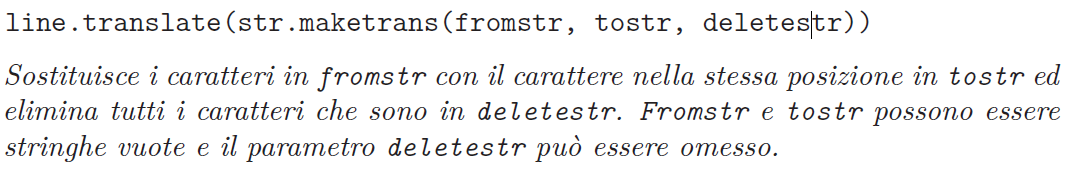


Non specificheremo la `tostr`, ma useremo il parametro `deletestr` per eliminare tutta la punteggiatura. Lasceremo persino che Python ci fornisca la lista dei caratteri che considera "punteggiatura":


In [ ]:
import string
string.punctuation

Ora effettuiamo le seguenti modifiche al nostro programma:
```
import string
fname = input('Enter the file name: ')
try:
    fhand = open(fname)
except:
    print('File cannot be opened:', fname)
    exit()

counts = dict()
for line in fhand:
    line = line.rstrip()
    line = line.translate(line.maketrans('', '', string.punctuation))
    line = line.lower()
    words = line.split()
    for word in words:
        if word not in counts:
            counts[word] = 1
        else:
            counts[word] += 1
print(counts)
```


Osserviamo l'output: è ancora poco gestibile ma possiamo usare Python per darci esattamente quello che stiamo cercando. Per farlo però dovremo vedere come funzionano le tuple di Python. Riprenderemo questo esempio una volta che avremo familiarità con queste cose.

***9.5 Debug***

Nel lavorare con insiemi di dati più grandi può risultare poco pratico eseguire il debug visualizzando e controllando i dati manualmente. Ecco alcuni suggerimenti per il debug di insiemi di dati di grandi dimensioni:
- **Ridimensionare l’input**: se possibile, ridurre la dimensione del dataset. Ad esempio, se il programma deve analizzare un file di testo, iniziamo con solo le prime 10 righe o con il campione più piccolo che riusciamo a trovare. Possiamo successivamente modificare il file stesso o (meglio) lo script in modo che legga solo le prime n righe.
- **Se c’è un errore**, riduciamo n al numero minore di righe in cui si manifesta l’errore, poi aumentiamolo gradualmente man mano che troviamo e correggi gli errori che si presentano.
- **Controllare i riepiloghi e i tipi**: anziché visualizzare e controllare l’intero set di
dati, prendiamo in considerazione la visualizzazione di riepiloghi dei dati: ad esempio, il numero di elementi in un dizionario o il totale di un elenco di numeri. Una causa comune negli errori di runtime è un valore del tipo errato. Per eseguire il debug di questo tipo di errore è spesso sufficiente visualizzarne il tipo e agire di conseguenza.

- **Inserire autocontrolli**: a volte possiamo scrivere del codice per verificare automaticamente
i possibili errori. Ad esempio, se si calcola la media di un elenco di numeri, è possibile verificare che il risultato non sia più grande o più piccolo di tutti gli elementi presenti. Questo viene definito *controllo di integrità* perché individua
risultati “completamente illogici”. Un altro tipo di controllo confronta i risultati di due diversi calcoli per verificare se sono coerenti. Questo è chiamato *controllo di coerenza*.
- **Visualizzare bene l’output**: la formattazione dell’output di debug può rendere più facile l’individuazione di un errore.

Il tempo speso per la costruzione di impalcature (scaffolding) può ridurre il tempo che dovrai spendere nel debugging.